<a href="https://colab.research.google.com/github/Blaqdiana/WiDs-assignment/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
### What is Customer Churn?
Customer churn, often simply referred to as "churn," is a metric used in business to describe the rate at which customers stop doing business with a company over a certain period of time. It's a crucial metric for businesses, especially those with subscription-based models or recurring revenue streams, as it directly impacts revenue and profitability.  
Churn rate is typically calculated by dividing the number of customers lost
during a specific time period by the total number of customers at the beginning of that period.  
The resulting percentage represents the proportion of customers who have discontinued their relationship with the company.   

**Why is Customer Churn Important?**  
A natural process of businesses is that customers will come and go but not all customers are here to stay. For example in the telecom industry, an individual might be there for a few months before churning and trying out a different service.   
Reducing churn is a key focus for many businesses, as retaining existing customers is often more cost-effective than acquiring new ones (ie it costs much more to acquire new customers than it does to retain existing customers).   
***Strategies for reducing churn include:***
* Improving customer service
* Enhancing product or service offerings
* Implementing loyalty programs
* Addressing issues that may be causing dissatisfaction among customers.

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
# Load the dataset
df = pd.read_csv("/content/Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Data preprocessing

In [ ]:
# Checking the dimensions od the DataFrame
df.shape

(7043, 21)

In [ ]:
# Checking for duplicate entries
df.duplicated().sum()

0

In [ ]:
# Checking the summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# Inspecting the total charges column
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
# Converting totalcharges data type to float
df['TotalCharges'] = df['TotalCharges'].replace({' ':None}).astype(float)
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [ ]:
# Mapping the senior citizen column to categorical data
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df["SeniorCitizen"]

0        No
1        No
2        No
3        No
4        No
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: SeniorCitizen, Length: 7043, dtype: object

In [ ]:
# Rplacing "No phone service" with No
df["MultipleLines"].replace("No phone service","No",inplace=True)
df["MultipleLines"].value_counts().index.values

array(['No', 'Yes'], dtype=object)

In [ ]:
# Replacing "No internet service" with No
cols = ["OnlineSecurity","OnlineBackup","DeviceProtection",
        "TechSupport","StreamingTV","StreamingMovies"]

for i in cols:
    df[i].replace("No internet service","No",inplace=True)

In [ ]:
# Replacing DSL and Fiber optic with Yes
df['InternetService+'] = df['InternetService'].replace({'DSL':'Yes','Fiber optic':'Yes'}, inplace=True)
df['InternetService+'].value_counts()

Series([], Name: InternetService+, dtype: int64)

In [ ]:
# Check if the column exists in the DataFrame
for col in cols:
    if col in df.columns[1:]:
        print(f"{col}:")
        print(df[col].value_counts().index.values)


OnlineSecurity:
['No' 'Yes']
OnlineBackup:
['No' 'Yes']
DeviceProtection:
['No' 'Yes']
TechSupport:
['No' 'Yes']
StreamingTV:
['No' 'Yes']
StreamingMovies:
['No' 'Yes']


In [ ]:
# Checking for missing values
df.isna().sum().sort_values(ascending=False)

InternetService+    7043
TotalCharges          11
gender                 0
Churn                  0
MonthlyCharges         0
PaymentMethod          0
PaperlessBilling       0
Contract               0
StreamingMovies        0
StreamingTV            0
TechSupport            0
customerID             0
OnlineBackup           0
OnlineSecurity         0
InternetService        0
MultipleLines          0
PhoneService           0
tenure                 0
Dependents             0
Partner                0
SeniorCitizen          0
DeviceProtection       0
dtype: int64

Checking the monthly charges and tenure columns to have a better understanding of the missing values in the total charges column better.  
Below are the description content of these columns in question
* tenure :- Number of months the customer has stayed with the company
* MonthlyCharges :- The amount charged to the customer monthly
* TotalCharges :- The total amount charged to the customer

In [ ]:
# Checking the content of the NaN values of the TotalCharges column against the tenure and MonthlyCharges
df[df['TotalCharges'].isna()][['tenure','MonthlyCharges','TotalCharges']]

,tenure,MonthlyCharges,TotalCharges
488,0,52.55,NaN
753,0,20.25,NaN
936,0,80.85,NaN
1082,0,25.75,NaN
1340,0,56.05,NaN
3331,0,19.85,NaN
3826,0,25.35,NaN
4380,0,20.00,NaN
5218,0,19.70,NaN
6670,0,73.35,NaN


In [ ]:
# Checking the unique values of tenure
df['tenure'].unique

<bound method Series.unique of 0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64>

In [ ]:
# Confirming the total number of  0 tenure values
(df['tenure'] == 0).sum()

11

In [ ]:
# Confirming the total number of  0 tenure values
(df['tenure'] == 1).sum()

613

**Okay I may have a theory**
* There are 11 customers who have a tenure of 0 (less than 1 month) , this means that they are yet to complete a month with the company and these  11 customers are the same customers who have no entry for total charges.
However there are  monthly charges recorded to these 11 customers. So it seems like the metric which was used to calculate the total charges column is 1 (ie customers who at least has a tenure value of 1 month)
* On that note, we'll fill the NaN values of the total charges column with the monthly charges against it.

In [ ]:
# Checking the above theory
df[(df['MonthlyCharges'] == df['TotalCharges'])]['tenure']

0       1
20      1
22      1
27      1
33      1
       ..
6979    1
7010    1
7016    1
7018    1
7032    1
Name: tenure, Length: 613, dtype: int64

In [ ]:
# Filling the missing values in total charges with monthly charges
df['TotalCharges'].fillna(df['MonthlyCharges'], inplace=True)
df['TotalCharges'].isna().sum()

0

In [ ]:
# Checking the numerical columns
df.select_dtypes(include='number')

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [ ]:
# Checking the categorical columns
df.select_dtypes(include='object')

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,InternetService+
0,7590-VHVEG,Female,No,Yes,No,No,No,Yes,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,None
1,5575-GNVDE,Male,No,No,No,Yes,No,Yes,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,None
2,3668-QPYBK,Male,No,No,No,Yes,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,None
3,7795-CFOCW,Male,No,No,No,No,No,Yes,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,None
4,9237-HQITU,Female,No,No,No,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No,None
7039,2234-XADUH,Female,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No,None
7040,4801-JZAZL,Female,No,Yes,Yes,No,No,Yes,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,None
7041,8361-LTMKD,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,None


In [ ]:
# Drop the customer ID column
df.drop("customerID",axis="columns",inplace=True)
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'InternetService+'],
      dtype='object')

In [ ]:
# Checking the summary of the numerical variables/columns
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.798992
std,24.559481,30.090047,2266.730170
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


### EDA and Data Visualization

In [ ]:
# Defining a countplot function to promote readability
def plot_count(col, col_name):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor="lightgray")

    # Count plot without churn
    sns.countplot(x=col, data=df, ax=axs[0], palette="viridis", edgecolor='black', hue=col, legend=False)
    axs[0].set_title(f"{col} (All)", fontsize=12)
    axs[0].bar_label(axs[0].containers[0], fontsize=8)

    # Count plot with churn
    sns.countplot(x=col, hue='Churn', data=df, ax=axs[1], palette="viridis", edgecolor='black', legend=False)
    axs[1].set_title(f"{col} by Churn", fontsize=12)
    axs[1].bar_label(axs[1].containers[0], fontsize=8)
    axs[1].bar_label(axs[1].containers[1], fontsize=8)

    # Rotate x-axis labels for better readability if needed
    for ax in axs:
        plt.xticks(rotation=45, ha='right')

    fig.suptitle(f"Visual Summary of {col_name} by Churn", fontsize=14)
    plt.tight_layout()
    plt.show()


**Churn**
* Customers who left within the last month

In [ ]:
print(df['Churn'].value_counts())
df['Churn'].value_counts(normalize=True)

No     5174
Yes    1869
Name: Churn, dtype: int64


No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

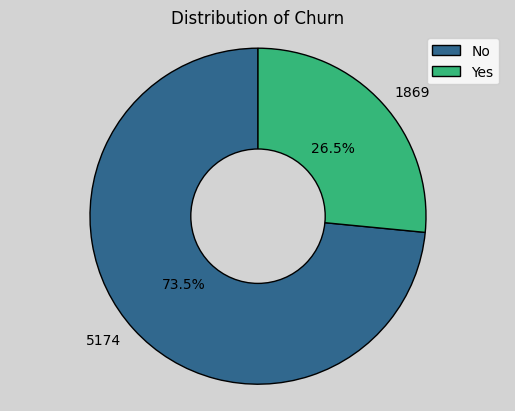

In [ ]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('lightgray')

# Get the viridis colors as a list
viridis_colors = sns.color_palette("viridis", n_colors=len(df["Churn"].value_counts()))

data = df["Churn"].value_counts()
ax.pie(data, autopct='%1.1f%%', startangle=90, labels=data.values, colors=viridis_colors, wedgeprops={'edgecolor': 'black'})
ax.legend(data.index)
ax.set_title("Distribution of Churn")

centre_circle = plt.Circle((0, 0), 0.4, fc='lightgray', edgecolor='black')
fig.gca().add_artist(centre_circle)
ax.axis('equal')

plt.show()


#### Demographic
* Demographic info about customers – gender, and if they have partners, are senior citizens and are dependents

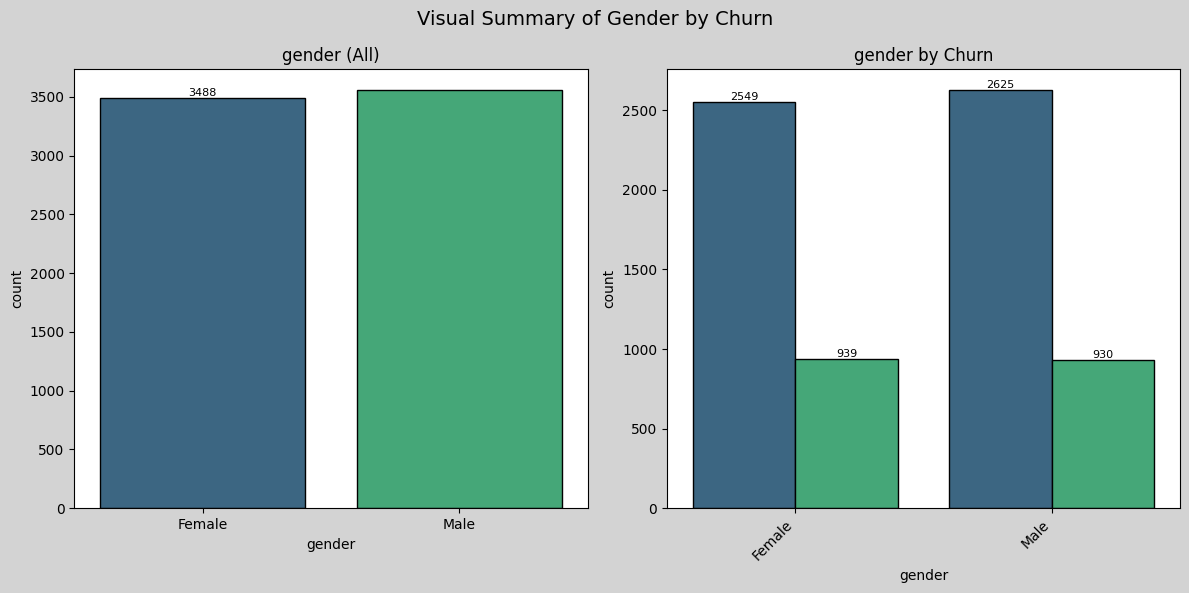

In [ ]:
plot_count('gender', 'Gender')

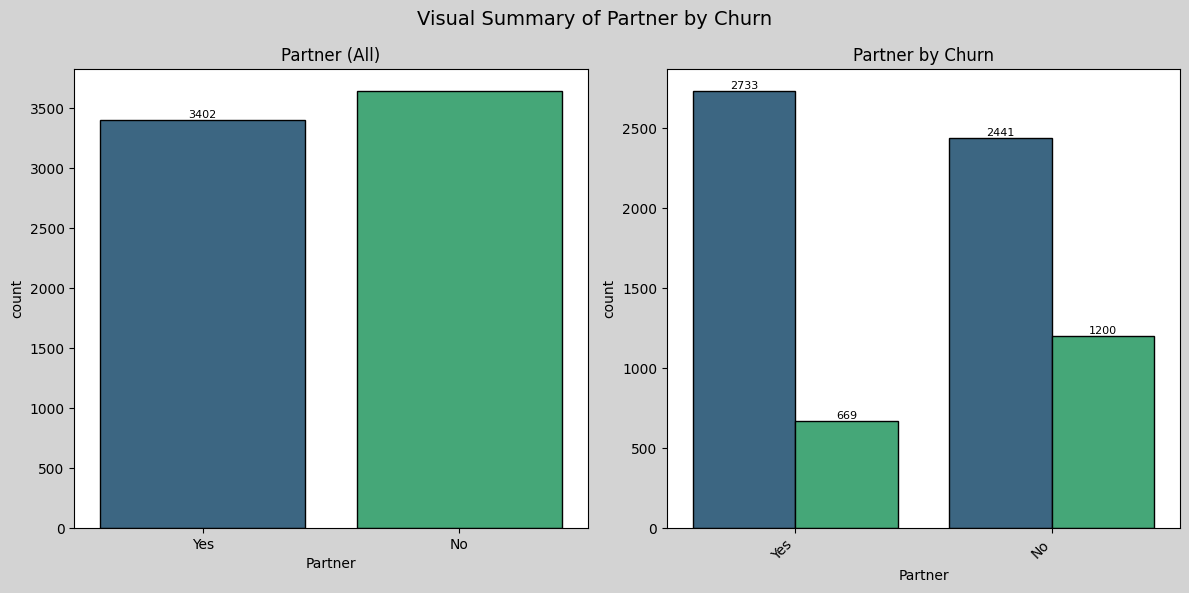

In [ ]:
plot_count('Partner', 'Partner')

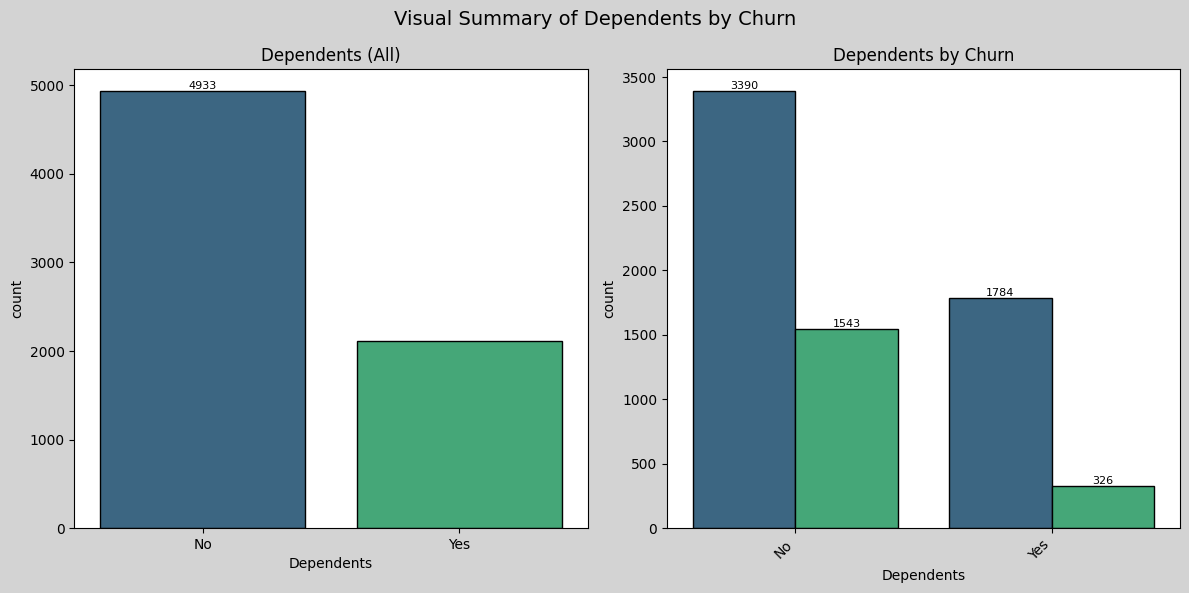

In [ ]:
plot_count('Dependents', 'Dependents')

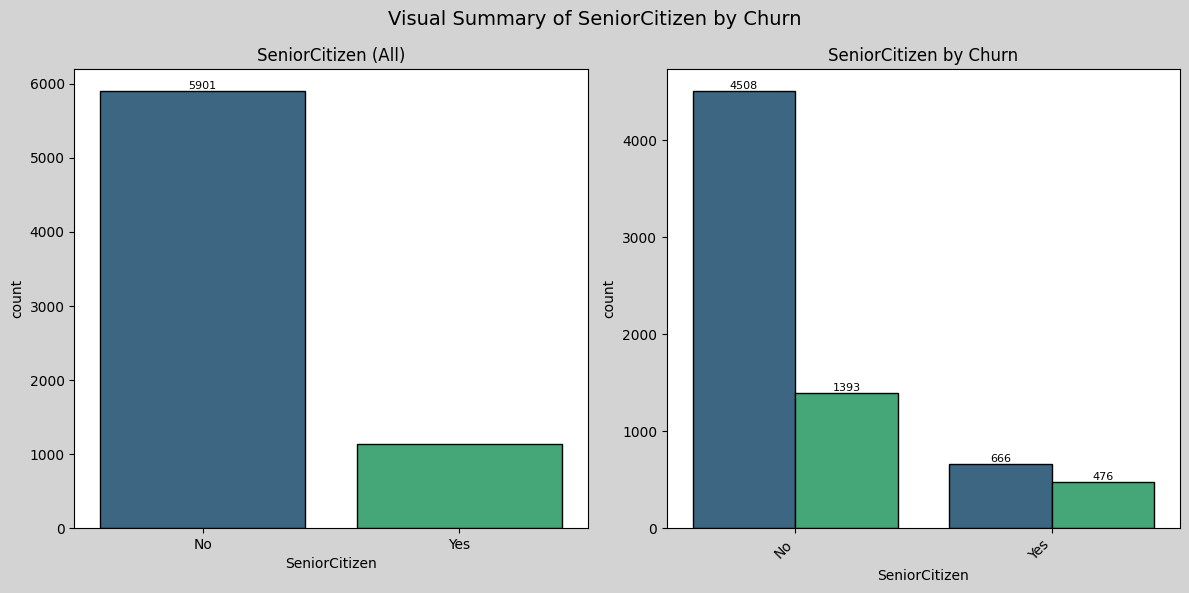

In [ ]:
plot_count('SeniorCitizen', 'SeniorCitizen')

#### Services
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

In [ ]:
def pie_charts(cols):
    """
    Creates pie charts for multiple columns in a DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame containing the data.
        cols (list): A list of column names to create pie charts for.
        figsize (tuple, optional): The size of the figure (default: (20, 12)).

    Returns:
        None
    """

    num_cols = len(cols)
    fig, axes = plt.subplots(1, num_cols, figsize=(20, 12), facecolor="lightgray")

    # Set custom color palette to viridis
    colors = sns.color_palette("viridis", n_colors=2)

    for i, col in enumerate(cols):
        data = df[col].value_counts()
        explode = [0] * len(data)  # Create a list with matching length

        # Ensure values sum to 1 to avoid empty wedge (Issue #1 addressed)
        if data.sum() > 1:
            data = data / data.sum()

        axes[i].pie(data, labels=data.index, autopct="%1.1f%%", labeldistance=1.1,
                    explode=explode, colors=colors, textprops={'fontsize': 17}, radius=1.0)
        axes[i].set_title(col, color="black", size=25)
        axes[i].legend(data.index, bbox_to_anchor=(2.0, 0.5), prop={'size': 15})

    plt.tight_layout()
    plt.show()


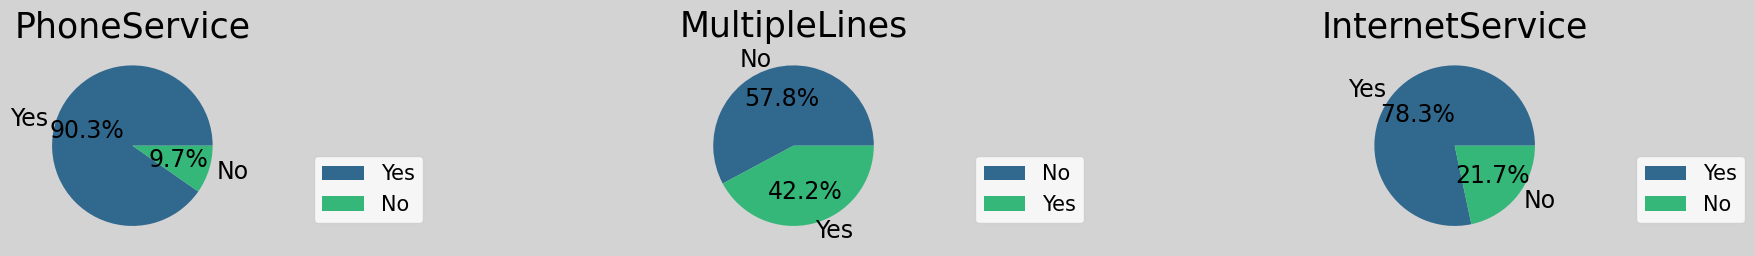

In [ ]:
col = ['PhoneService', 'MultipleLines', 'InternetService']

pie_charts(col)

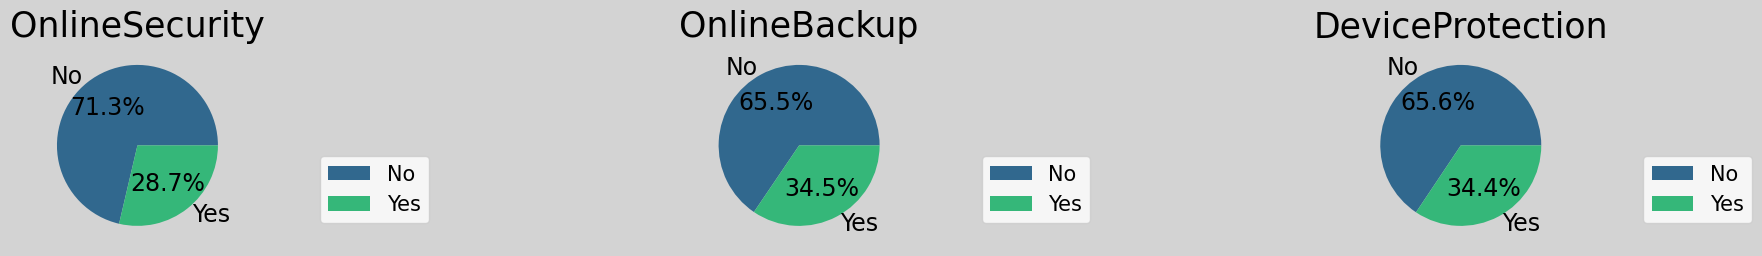

In [ ]:
col1 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection']

pie_charts(col1)

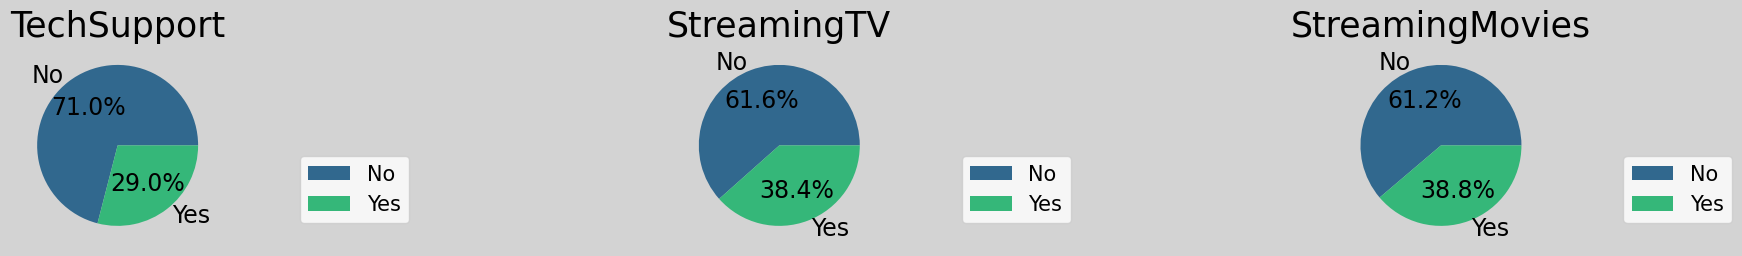

In [ ]:
col2 = ['TechSupport', 'StreamingTV', 'StreamingMovies']

pie_charts(col2)

**Services vs Churn Rate**

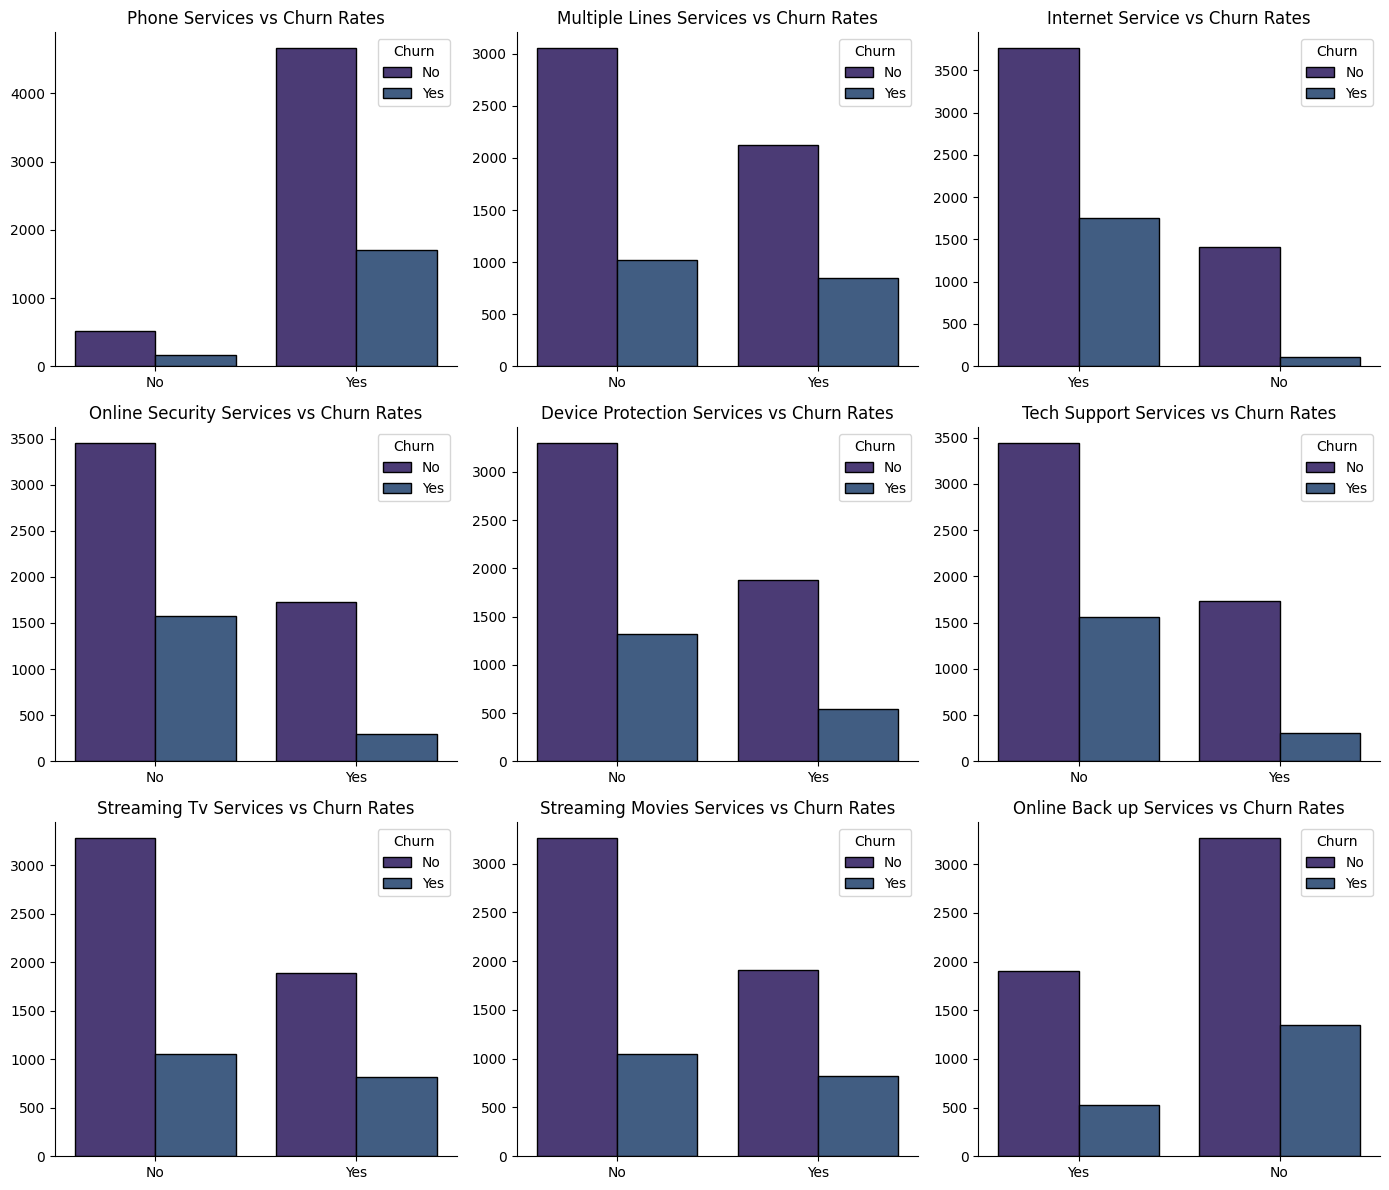

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14,12))

# Set custom color palette to viridis
sns.set_palette(sns.color_palette("viridis"))

# Graphing with black edges
sns.countplot(x="PhoneService", hue="Churn", data=df, ax=axes[0,0], edgecolor='black').set(title='Phone Services vs Churn Rates', xlabel=None, ylabel = None)
sns.countplot(x="MultipleLines", hue="Churn", data=df, ax=axes[0,1], edgecolor='black').set(title='Multiple Lines Services vs Churn Rates', xlabel=None, ylabel = None)
sns.countplot(x="InternetService", hue="Churn", data=df, ax=axes[0,2], edgecolor='black').set(title='Internet Service vs Churn Rates', xlabel=None, ylabel = None)
sns.countplot(x="OnlineSecurity", hue="Churn", data=df, ax=axes[1,0], edgecolor='black').set(title='Online Security Services vs Churn Rates', xlabel=None, ylabel = None)
sns.countplot(x="DeviceProtection", hue="Churn", data=df, ax=axes[1,1], edgecolor='black').set(title='Device Protection Services vs Churn Rates', xlabel=None, ylabel = None)
sns.countplot(x="TechSupport", hue="Churn", data=df, ax=axes[1,2], edgecolor='black').set(title='Tech Support Services vs Churn Rates', xlabel=None, ylabel = None)
sns.countplot(x="StreamingTV", hue="Churn", data=df, ax=axes[2,0], edgecolor='black').set(title='Streaming Tv Services vs Churn Rates', xlabel=None, ylabel = None)
sns.countplot(x="StreamingMovies", hue="Churn", data=df, ax=axes[2,1], edgecolor='black').set(title='Streaming Movies Services vs Churn Rates', xlabel=None, ylabel = None)
sns.countplot(x="OnlineBackup", hue="Churn",data=df, ax=axes[2,2], edgecolor='black').set(title='Online Back up Services vs Churn Rates', xlabel=None, ylabel = None)

sns.despine()
plt.tight_layout()
plt.show()


#### Customer Account Information
* Customer account information – how long they’ve been a customer(tenure), contract, payment method, paperless billing, monthly charges, and total charges

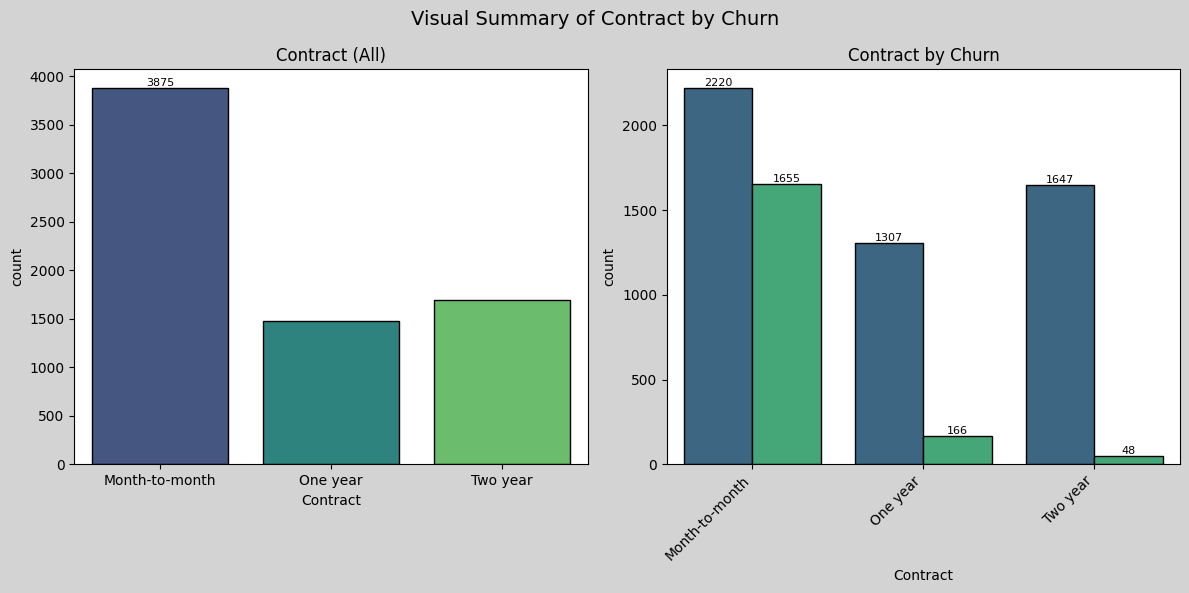

In [ ]:
plot_count('Contract', 'Contract')

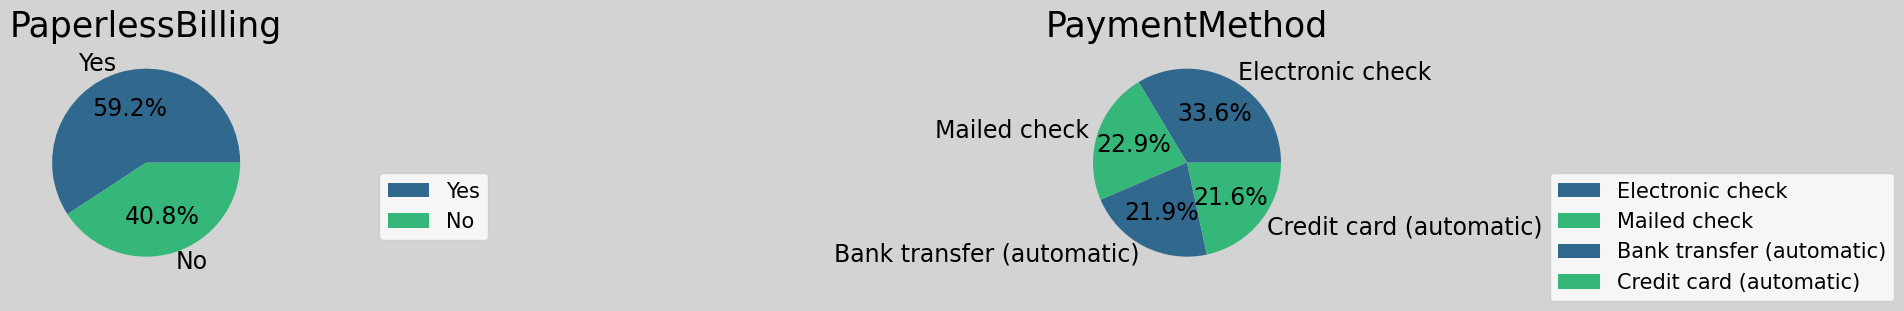

In [ ]:
col3 = ['PaperlessBilling', 'PaymentMethod']

pie_charts(col3)

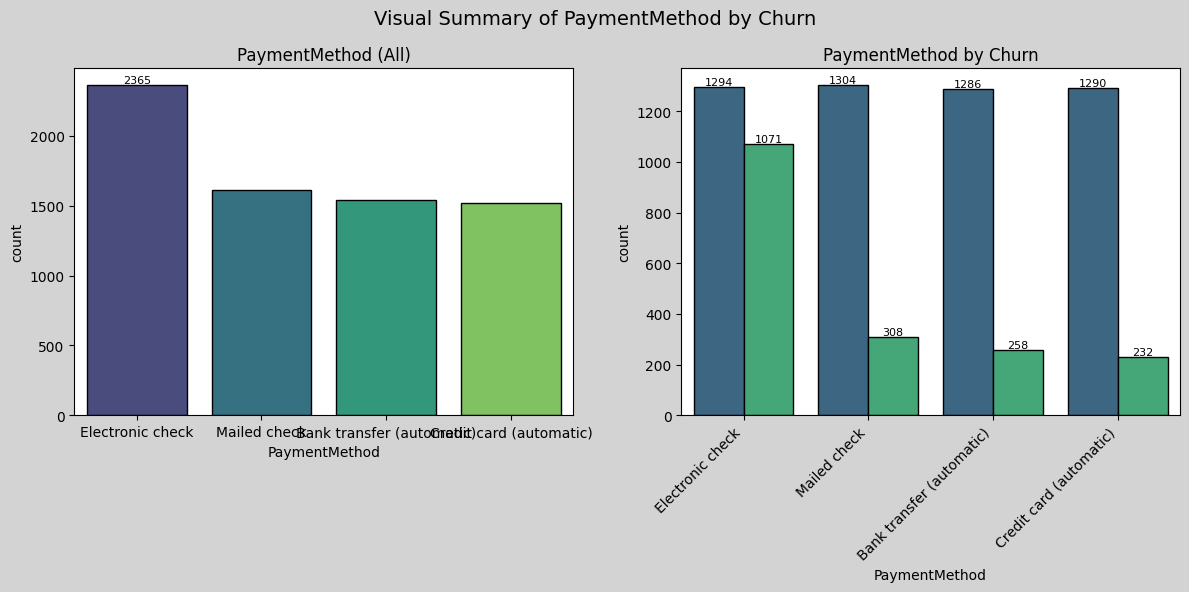

In [ ]:
plot_count('PaymentMethod', 'PaymentMethod')

In [ ]:
def double_plots(col):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))  # Create a figure with 2 subplots

    # Set custom color palette to viridis
    colors = sns.color_palette("viridis", n_colors=2)

    # Plot 1: Histograms
    sns.histplot(data=df, x=col, kde=True, ax=ax1, color=colors[0])
    ax1.set_ylabel('Count')
    ax1.set_xlabel(f'{col}')
    ax1.set_title(f'Distribution of {col}')

    # Plot 2: KDE plot with hue
    sns.kdeplot(df, x=col, hue='Churn', ax=ax2, palette=colors)
    ax2.legend(["Not Churn", "Churn"], loc='upper right')
    ax2.set_ylabel('Density')
    ax2.set_xlabel(f'{col}')
    ax2.set_title(f'Distribution of {col} by churn')

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()


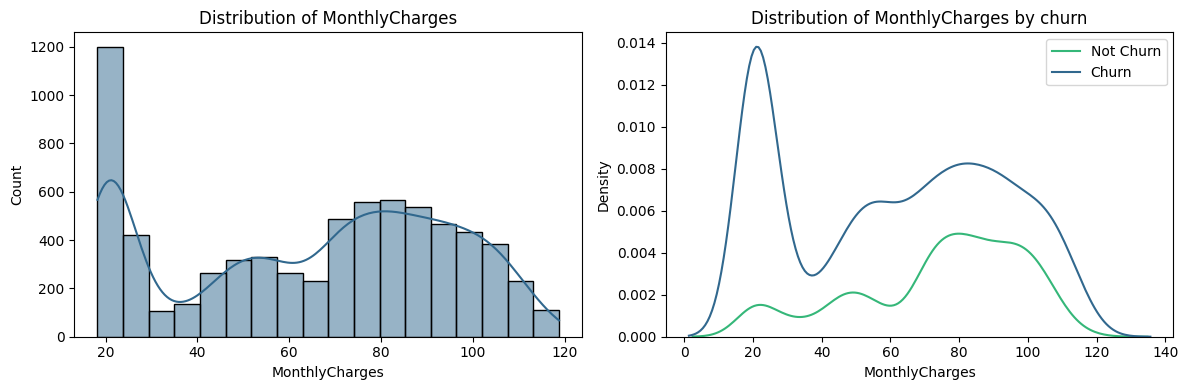

In [ ]:
double_plots('MonthlyCharges')

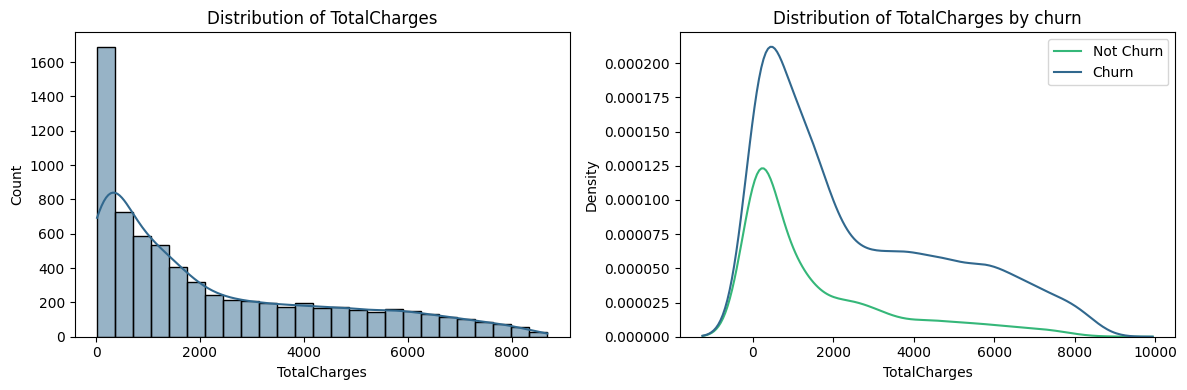

In [ ]:
double_plots('TotalCharges')

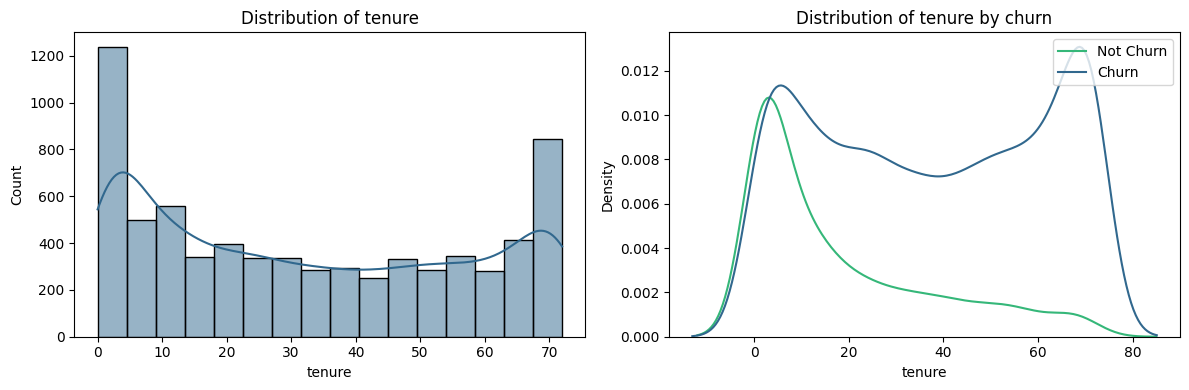

In [ ]:
double_plots('tenure')

<function matplotlib.pyplot.show(close=None, block=None)>

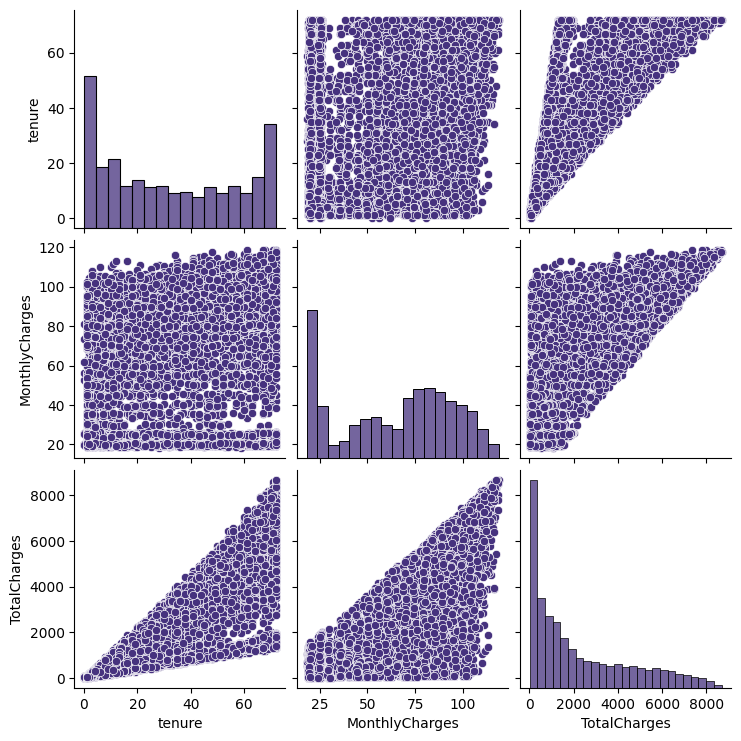

In [ ]:
# Set custom color palette to viridis
sns.set_palette("viridis")

# Generate pairplot
sns.pairplot(df[['tenure','MonthlyCharges','TotalCharges']])
plt.show


<Axes: >

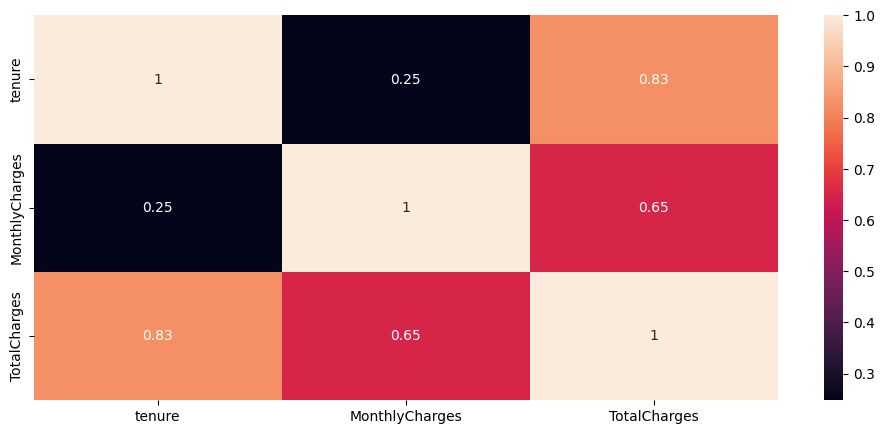

In [ ]:
plt.figure(figsize=(12,5))
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges']].corr(),annot=True)

### Feature Engineering

In [ ]:
num_cols = list(df.select_dtypes('number'))
df[num_cols].head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [ ]:
cat_cols = list(df.select_dtypes('object'))
df[cat_cols].head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,InternetService+
0,Female,No,Yes,No,No,No,Yes,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,None
1,Male,No,No,No,Yes,No,Yes,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,None
2,Male,No,No,No,Yes,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,None
3,Male,No,No,No,No,No,Yes,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,None
4,Female,No,No,No,Yes,No,Yes,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,None


In [ ]:
# Label encode object
encoder = LabelEncoder()

# Apply LabelEncoder to each of the categorical columns
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

# Print the head of the dataframe
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService+
0,0,0,1,0,1,0,0,1,0,1,...,0,0,0,0,1,2,29.85,29.85,0,0
1,1,0,0,0,34,1,0,1,1,0,...,0,0,0,1,0,3,56.95,1889.50,0,0
2,1,0,0,0,2,1,0,1,1,1,...,0,0,0,0,1,3,53.85,108.15,1,0
3,1,0,0,0,45,0,0,1,1,0,...,1,0,0,1,0,0,42.30,1840.75,0,0
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,151.65,1,0


### Scaling Data (numeric columns only)

In [ ]:
scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])

In [58]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService+
0,0,0,1,0,-1.277445,0,0,1,0,1,...,0,0,0,0,1,2,-1.160323,-0.992667,0,0
1,1,0,0,0,0.066327,1,0,1,1,0,...,0,0,0,1,0,3,-0.259629,-0.172198,0,0
2,1,0,0,0,-1.236724,1,0,1,1,1,...,0,0,0,0,1,3,-0.362660,-0.958122,1,0
3,1,0,0,0,0.514251,0,0,1,1,0,...,1,0,0,1,0,0,-0.746535,-0.193706,0,0
4,0,0,0,0,-1.236724,1,0,1,0,0,...,0,0,0,0,1,2,0.197365,-0.938930,1,0


### Model building

In [ ]:
X = df.drop("Churn",axis="columns")
y = df["Churn"]

### Observation
It was noted that the dataset seems to be imbalanced and this is as a result of the high rate of "No" churning custormers, it took up 73.5% of the entries in the dataset.  

This will not fare well with our model as it will lead to bias and possibly poor performance on unseen data, so we are going to handle the imbalance in the data first before proceeding to train our model

**Handling Data Imbalance with SMOTE**

In [ ]:
print(X.shape, y.shape)

(7043, 20) (7043,)


In [ ]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to the training data to create synthetic samples
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

In [ ]:
print(X_smote.shape, y_smote.shape)

(10348, 20) (10348,)


In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

In [ ]:
# Train a Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
y_pred = rfc.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 1, 1])

In [ ]:
# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.8357487922705314

Confusion Matrix:
 [[829 192]
 [148 901]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83      1021
           1       0.82      0.86      0.84      1049

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



### Model Performance Evaluation
* **Accuracy Score:** The accuracy score is the simplest way to evaluate a model. It represents the proportion of correct predictions over the total predictions. The rfc model’s accuracy score is approximately 0.836, which means the model correctly predicted whether a customer would churn or not about 83.6% of the time.

* **Confusion Matrix:** The confusion matrix is a table that describes the performance of a classification model.
  - **True Positive (TP):** 901 - The number of churning customers correctly classified as churning.
  - *T*rue Negative (TN):** 829 - The number of non-churning customers correctly classified as non-churning.
  - **False Positive (FP):** 192 - The number of non-churning customers incorrectly classified as churning.
  - **False Negative (FN):** 148 - The number of churning customers incorrectly classified as non-churning.

* **Classification Report:** The classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results:
  - **Precision:** Precision measures the proportion of true positive   predictions among all positive predictions made by the model. A high precision indicates that when the model predicts a customer is churning, it is likely correct. In this case, the precision for class 0 is 0.85, and for class 1 is 0.82. It seems model is good at identifying true churners from those it predicts to churn.

  - **Recall:** Recall (also known as sensitivity) measures the proportion of actual positive cases that were correctly predicted by the model. High recall means the model is able to capture most of the positive cases. In this case, the recall for class 0 is 0.81, and for class 1 is 0.86. The model catches most of the actual churners.
  ***NOTE*** Lower recall for Class 0 (non-churners) is less concerning in churn prediction.

* **F1-Score:** F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. F1-score is often used when there is an uneven class distribution, as in this case. F1-score ranges from 0 to 1, where 1 is the best value. In this case, the F1-score for class 0 is 0.83, and for class 1 is 0.84.

Overall, the rfc model performs reasonably well.
  - It shows relatively good performance in terms of accuracy, precision, recall, and F1-score, indicating that it is effective in predicting both churning and non-churning customers.
  - The precision and recall for both classes are balanced, which suggests that the model is equally good at identifying both churning and non-churning customers.

# Recommendations
Telecommunication companies can use insights from this model to implement targeted retention strategies for customers identified as likely to churn. This might include;
- Offering discounts to customers
- Personalized offers for customer
- Improving customer service for those at risk of leaving.


**Side note**
There is still room for improvement, especially in reducing false positives (non-churning customers incorrectly classified as churning) as this can lead to wasted resources on unnecessary retention efforts.
  - Additionally, the model can be periodically re-evaluated and fine-tuned with new data to ensure its effectiveness over time.